In [5]:
from scipy.signal import kaiserord, lfilter, firwin, freqz
import matplotlib.pyplot as plt
from ipywidgets import *
import numpy as np
from com.sbk.dspbase.signals.sinus import Sinus
from com.sbk.dspbase.filters.windowedsinc.windowed_sinc \
    import blackman_windowed_sinc_normalized


In [6]:
sample_rate = 1000
nyq_rate = sample_rate / 2.0
width = 5.0/nyq_rate
ripple_db=60
N, beta = kaiserord(ripple_db, width)
max_amplitude = 10
max_frequency = 50
a1=2
a2=5
a3=8
delay = 0.5 * (N-1) / sample_rate

In [7]:
def plot_all(f1, f2, f3,  cutoff_hz):
    f = build_low_pass_filter(N, beta, cutoff_hz)
    t,s = Sinus.build_sin_waves(sample_rate, a1 ,f1, a2,f2, a3, f3)
    f_s = lfilter(f, 1.0, s)
    plot_signals(t, s, f_s)
    plot_frequency_responses(s, f_s)

 
def plot_signals(t, s, f_s): 
    plt.plot(t, s, label='Input Signal')
    plt.plot(t-delay, f_s, 'r-', label="Phase delay compensation")
    plt.plot(t[N-1:]-delay, f_s[N-1:], label='Filtered Signal', linewidth=3)
    plt.title("Input and Filtered signal")
    plt.xlabel("Sample")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.show()
 
    
def plot_frequency_responses(s, f_s): 
    plt.plot(abs(np.fft.fft(s))[0:max_frequency], label="FR of input signal")
    plt.plot(abs(np.fft.fft(f_s))[0:max_frequency], label="FR of filtered signal", linewidth=3)
    plt.title("Frequency response of input and filtered signal")
    plt.xlabel("Frequency")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.show() 

 
def plot_low_pass_filter(f):
    plt.plot(f)
    plt.show()
    w, h = freqz(f, worN=8000)
    h_ = np.absolute(h)
    p_f = ((w/np.pi)*nyq_rate)
    plt.plot(p_f, h_, linewidth=2)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Gain')
    plt.title('Frequency Response')
    plt.ylim(-0.05, 1.05)
    plt.show()
    
    
def build_low_pass_filter(N, beta, cutoff_hz):
    taps = firwin(N, cutoff_hz/nyq_rate, window=('kaiser', beta))
    return taps    


<p>Failed to display Jupyter Widget of type <code>interactive</code>.</p>
<p>
  If you're reading this message in the Jupyter Notebook or JupyterLab Notebook, it may mean
  that the widgets JavaScript is still loading. If this message persists, it
  likely means that the widgets JavaScript library is either not installed or
  not enabled. See the <a href="https://ipywidgets.readthedocs.io/en/stable/user_install.html">Jupyter
  Widgets Documentation</a> for setup instructions.
</p>
<p>
  If you're reading this message in another frontend (for example, a static
  rendering on GitHub or <a href="https://nbviewer.jupyter.org/">NBViewer</a>),
  it may mean that your frontend doesn't currently support widgets.
</p>

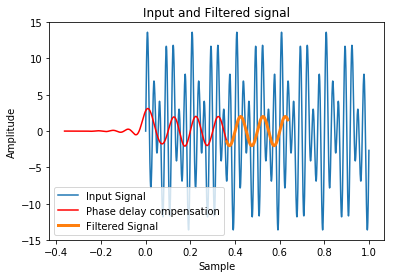

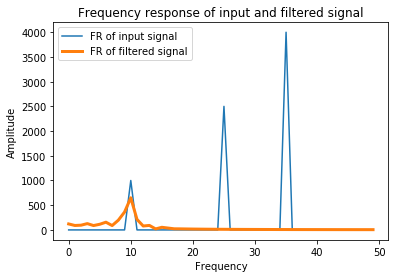

<function __main__.plot_all>

In [8]:
interact(plot_all, 
         f1= widgets.IntSlider(value=max_frequency*0.2, min=0, max=max_frequency, description="Frequency 1"), 
         f2= widgets.IntSlider(value=max_frequency*0.5, min=0, max=max_frequency, description="Frequency 2"),
         f3= widgets.IntSlider(value=max_frequency*0.7, min=0, max=max_frequency, description="Frequency 3"),
         cutoff_hz=widgets.IntSlider(value=max_frequency*0.3, min=0, max=max_frequency, description="Cut-off"))






